<a href="https://colab.research.google.com/github/sriram0339/notebooks/blob/master/HackCUForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install pulp

     |████████████████████████████████| 39.2MB 101kB/s 


# Data Driven Forecasting

We will explore how models can be built for time series forecasting with applications ranging from financial forecasting to helping people with type-1 diabetes.

We will start with the familiar concept of regression.

## Linear Regression

Regression is (more or less) the task of fitting a curve to data. The most common type of regression is called _least squares_ regression.


Text(0, 0.5, 'y')

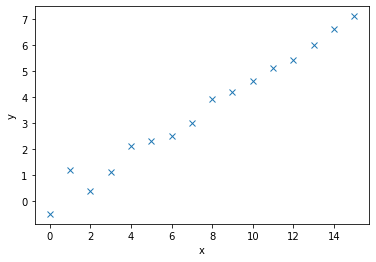

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Here is our data for x and y
x = np.matrix([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 , 13, 14, 15]).T
y = np.matrix([-0.5, 1.2, 0.4, 1.1, 2.1, 2.3, 2.5, 3.0, 3.9, 4.2, 4.6, 5.1, 5.4, 6.0, 6.6, 7.1 ]).T
# plot it
plt.plot(x, y, 'x')
plt.xlabel('x')
plt.ylabel('y')

Best fit line slope: 0.46290322580645155


Text(0, 0.5, 'y')

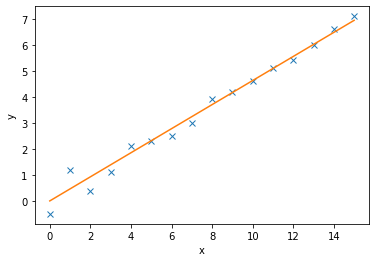

In [3]:
# To find the best fit, solve the least squares problem
# lstsq returns a tuple, just take the first item of the tuple it returns
m = np.linalg.lstsq(x, y, rcond=None)[0] 
# Print the slope
print('Best fit line slope:', m[0,0])
# plot the fit
plt.plot(x, y, 'x')
plt.plot(x, m[0,0] * x )
plt.xlabel('x')
plt.ylabel('y')

Data can often have more than one inputs $(x_1, \ldots, x_n)$.
This is called multilinear regression in statistics.
Here is some data wherein $y$ depends on $\vec{x}: (x_1, x_2, x_3)$.

## Residuals

After we have fit a model to the data, the residual is simply the 
difference between actual $y$ value and that predicted by the model.

$$ r = y - A x$$

In [0]:
# Generate some data on x
x = np.random.normal(size=(10000,3))
# Generate y
y = x*np.matrix([[1],[1.2],[-0.4]]) + np.random.normal(size=(10000,1))

Model: y = 0.980029 * x1 + 1.192999 * x2 + -0.398122 * x3


(array([  1.,   1.,   7.,   5.,  10.,  13.,  30.,  38.,  50.,  86., 106.,
        132., 192., 232., 283., 339., 402., 454., 485., 537., 547., 605.,
        615., 590., 575., 557., 509., 464., 402., 377., 298., 247., 188.,
        164., 138.,  92.,  75.,  48.,  41.,  26.,  14.,  11.,   5.,   2.,
          2.,   1.,   0.,   2.,   1.,   1.]),
 array([-3.48388371, -3.33055771, -3.17723172, -3.02390573, -2.87057973,
        -2.71725374, -2.56392774, -2.41060175, -2.25727575, -2.10394976,
        -1.95062376, -1.79729777, -1.64397177, -1.49064578, -1.33731978,
        -1.18399379, -1.03066779, -0.8773418 , -0.72401581, -0.57068981,
        -0.41736382, -0.26403782, -0.11071183,  0.04261417,  0.19594016,
         0.34926616,  0.50259215,  0.65591815,  0.80924414,  0.96257014,
         1.11589613,  1.26922212,  1.42254812,  1.57587411,  1.72920011,
         1.8825261 ,  2.0358521 ,  2.18917809,  2.34250409,  2.49583008,
         2.64915608,  2.80248207,  2.95580807,  3.10913406,  3.26246006,
 

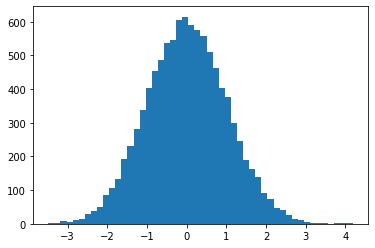

In [5]:
# lstsq returns a tuple, just take the first item of the tuple it returns
m = np.linalg.lstsq(x, y, rcond=None)[0] 
# Print the slope
print('Model: y = %f * x1 + %f * x2 + %f * x3' % (m[0,0], m[1,0], m[2,0]) )
residuals = y - x * m
plt.hist(residuals, bins=50)

## Thinking Nonlinear?

Data does not always have to fit a straight line. Let's generate some data that is not "straight line"

In [0]:
x = np.matrix(np.arange(0, 10, 0.2)).T
m = (x.shape)[0]
y = np.sin(x * 2* 3.1415/10) + 0.6*  np.cos(x * 2 * 3.1415/5) - 0.1 * x + 0.005 * np.square(x) + 0.4 + 0.1 * np.random.normal(size=(m,1))

Text(0, 0.5, 'y')

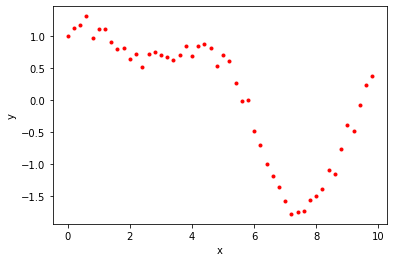

In [7]:
plt.plot(x, y, 'r.')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

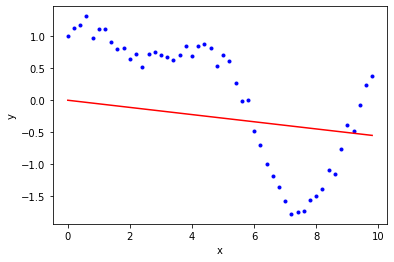

In [8]:
m = np.linalg.lstsq(x, y, rcond=None)[0] 
plt.plot(x, y, 'b.')
plt.plot(x, m[0,0]* x, 'r')
plt.xlabel('x')
plt.ylabel('y')

## Nonlinear models: Augmenting the Data

$$x = \left[ \begin{array}{c} x(0) \\ x(1) \\ \vdots \\ x(m) \\ \end{array}\right]$$

Instead make a matrix

$$X = \left[ \begin{array}{ccccc}
1 & x(0) & x(0)^2 & \sin(2 \pi x(0)/10) & \cos(2 \pi x(0)/5) \\
1 & x(1) & x(1)^2 & \sin(2 \pi x(1)/10) & \cos(2 \pi x(1)/5) \\
1 & x(2) & x(2)^2 & \sin(2 \pi x(2)/10) & \cos(2 \pi x(2)/5) \\
\vdots &  & & \ddots & \vdots \\
1 & x(m) & x(m)^2 & \sin(2 \pi x(m)/10) & \cos(2 \pi x(m)/5) \\
\end{array}\right] $$



In [0]:
(m,_) = x.shape
# Create the matrix X
X = np.concatenate(
    (
    np.ones(shape=(m,1)),
    x,
    np.square(x),
    np.sin(2*3.1415*x/10.0),
    np.cos(2*3.1415*x/5.0)
    ), 
    axis = 1
)

In [10]:
c = np.linalg.lstsq(X,y,rcond=None)[0]
print('Model: %f + %f * x + %f * x^2 + %f * sin(2 pi x/10) + %f * cos(2 pi x/5)' %(c[0], c[1], c[2], c[3], c[4]))

Model: 0.427821 + -0.115104 * x + 0.006263 * x^2 + 1.025988 * sin(2 pi x/10) + 0.598762 * cos(2 pi x/5)


Text(0, 0.5, 'y')

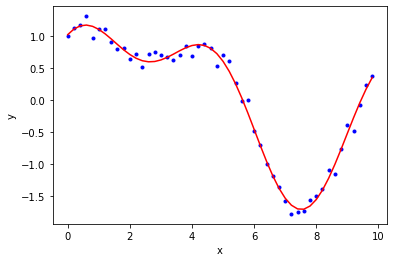

In [11]:
modelPredictions = c[0,0] + c[1,0] * x + c[2,0]*np.square(x) + c[3,0] *(np.sin(2*3.1415*x/10)) + c[4,0] * np.cos(2 * 3.1415*x/5)
plt.plot(x, y, 'b.')
plt.plot(x,modelPredictions , 'r')
plt.xlabel('x')
plt.ylabel('y')

(array([1.47115727, 1.47115727, 0.98077151, 3.43270029, 3.92308604,
        6.37501482, 2.45192878, 1.96154302, 1.96154302, 0.49038576]),
 array([-0.20192463, -0.16114041, -0.12035619, -0.07957198, -0.03878776,
         0.00199646,  0.04278068,  0.0835649 ,  0.12434912,  0.16513334,
         0.20591756]),
 <a list of 10 Patch objects>)

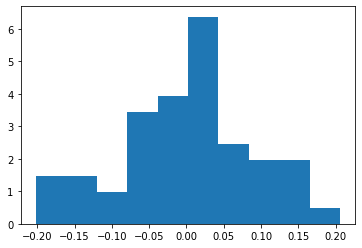

In [12]:
residuals = y - modelPredictions
plt.hist(residuals, bins=10, density=True)

## Exploration on Euro-USD currency rate data

In [0]:
# OPEN A CSV FILE WITH DATA
# REMEMBER TO UPLOAD THE FILE

def openCSVFile(fileName, cols): 
    f = open('euro-usd-data.csv')
    data = []
    for line in f:
        lineEntries = line.split(',')
        data.append([float(lineEntries[j]) for j in cols])
    f.close()
    return data
data = openCSVFile('./euro-usd-data.csv',[0,1])
dataMat = np.matrix(data)
t0 = dataMat[:, 0]
r0 = dataMat[:, 1]

times = t0[0:55, :]
rates = r0[0:55, :]

# Hold back 5 months of data
predTimes = t0[54:60, :]
predRatesGroundTruth = r0[54:60,:]



Text(0, 0.5, 'Euro vs. USD conversion rate')

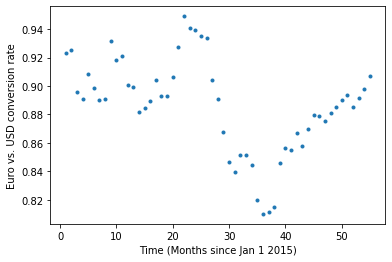

In [328]:
plt.plot(times, rates,'.')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

In [0]:
m = times.shape[0]
pi = 3.1415
X = np.concatenate(  (np.ones((m,1)), times, np.square(times), np.power(times, 3)),  axis = 1 )
for i in range(3,60):
    X = np.concatenate((X, np.sin(2*pi*times/i), np.cos(2*pi*times/i)), axis = 1)


In [330]:
mdl = np.linalg.lstsq(X, rates, rcond=None)[0]
print(mdl)

[[ 1.53648565e+05]
 [-6.66444221e+04]
 [ 2.64086369e+03]
 [-2.39649971e+01]
 [ 5.96236004e-04]
 [ 7.57867929e-04]
 [ 2.82816957e-03]
 [-9.85504537e-04]
 [ 7.50010976e-03]
 [ 4.02773589e-03]
 [-2.06685219e-01]
 [-7.75422593e-02]
 [-8.25642428e-01]
 [-6.05462895e+00]
 [-1.30093403e+01]
 [-1.25494363e+02]
 [-1.16661811e+03]
 [-1.18138137e+03]
 [-1.24592943e+04]
 [ 4.96200437e+03]
 [ 2.15125373e+04]
 [ 6.10287133e+04]
 [ 1.48005521e+05]
 [-9.47526184e+04]
 [-1.88659964e+05]
 [-1.18383438e+05]
 [ 2.38347203e+03]
 [ 1.68603136e+04]
 [-1.12790940e+05]
 [ 1.10263117e+05]
 [-5.52583346e+04]
 [-1.11795946e+03]
 [ 6.48457548e+04]
 [ 4.08383632e+04]
 [ 4.38353940e+04]
 [ 1.07574400e+05]
 [-1.38875021e+04]
 [ 7.25541822e+04]
 [-7.57783754e+03]
 [-1.41817303e+03]
 [ 4.26154956e+04]
 [-3.43761433e+04]
 [ 7.99984761e+04]
 [-1.76939253e+04]
 [ 7.93845764e+04]
 [ 1.51346874e+04]
 [ 5.04323968e+04]
 [ 3.39207332e+04]
 [ 1.51518122e+04]
 [ 2.91126901e+04]
 [-9.68006258e+03]
 [ 7.21651609e+03]
 [-1.7952314

Text(0, 0.5, 'Euro vs. USD conversion rate')

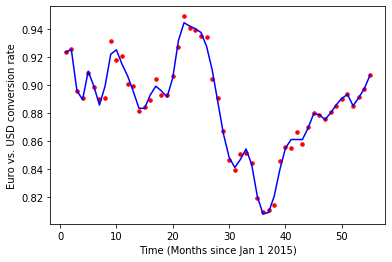

In [331]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*mdl,'b')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

(array([ 11.95413501,   0.        ,  47.81654005,  59.77067506,
         23.90827002, 119.54135012, 191.2661602 ,  71.72481007,
         59.77067506,  11.95413501,  47.81654005,  11.95413501]),
 array([-0.00952013, -0.00799917, -0.0064782 , -0.00495724, -0.00343627,
        -0.00191531, -0.00039434,  0.00112662,  0.00264759,  0.00416855,
         0.00568952,  0.00721048,  0.00873145]),
 <a list of 12 Patch objects>)

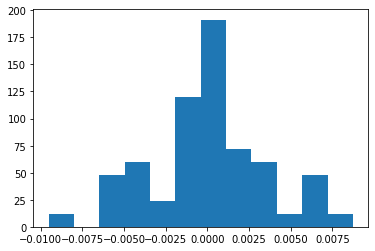

In [332]:
residuals = X * mdl - rates
plt.hist(residuals, bins=12, density=True)

In [333]:
newTimes = predTimes
newM = np.shape(newTimes)[0]
newX = np.concatenate(  (np.ones((newM,1)), newTimes, np.square(newTimes), np.power(newTimes, 3)), axis = 1 )
for i in range(3,60):
    newX = np.concatenate((newX, np.sin(2*pi*newTimes/i), np.cos(2*pi*newTimes/i)), axis = 1)

predRatesL2 = newX * mdl
print(predRatesL2)

[[9.07174050e-01]
 [4.44571901e+00]
 [3.77510037e+01]
 [2.13086566e+02]
 [8.83381005e+02]
 [2.94334840e+03]]


Text(0, 0.5, 'Euro vs. USD conversion rate')

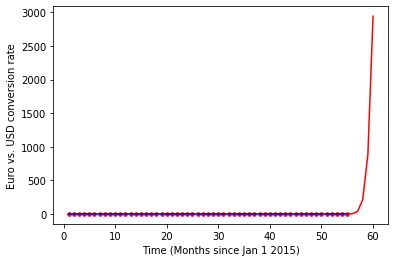

In [334]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*mdl,'b')
plt.plot(newTimes, predRatesL2,'r')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

## Norms

L1, L2, Lp and Linfty norms

L2 norm: 2.692582, L1 norm: 5.500000, L3 norm: 2.232373, Linfty norm: 2.000000


Text(0, 0.5, 'L_p norm')

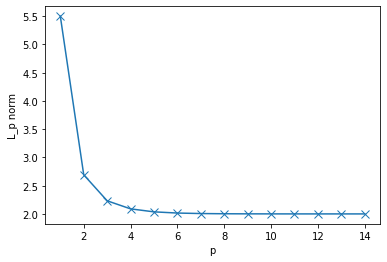

In [335]:
x = np.array([1, 2, 1, 0, -0.5, 1])
v2 = np.linalg.norm(x, ord=2)
v1 = np.linalg.norm(x, ord=1)
v3 = np.linalg.norm(x, ord=3.0)
vinf = np.linalg.norm(x, ord=float('inf'))
print('L2 norm: %f, L1 norm: %f, L3 norm: %f, Linfty norm: %f' % (v2, v1, v3, vinf))
ords = list(range(1, 15))
norms = [np.linalg.norm(x, ord=j) for j in ords] 
plt.plot(ords, norms, '-x', markerSize=8)
plt.xlabel('p')
plt.ylabel('L_p norm')


# Regularized Least Squares

In [0]:
import pulp

def solveL1NormLeastSquares(A, b):
    (m,n) = np.shape(A)
    assert(np.shape(b) == (m,1))
    problem = pulp.LpProblem('L1LeastSquares',pulp.LpMinimize)
    xVars = pulp.LpVariable.dicts("x", range(n))
    tVars = pulp.LpVariable.dicts("t", range(m), 0)
    regVars = pulp.LpVariable.dicts("r", range(n), 0)
    problem += pulp.lpSum([ tVars[i] for i in range(m) ]) + pulp.lpSum([regVars[i] for i in range(n)]), "Sum of all the t and regvariables"
    for i in range(m):
        problem += pulp.lpSum([ A[i,j] * xVars[j] for j in range(n)]) <= b[i,0] + tVars[i] ## Sum_j A(i,j) x(j) <= b(i) + t(i)
        problem += pulp.lpSum([ A[i,j] * xVars[j] for j in range(n) ]) >= b[i,0] -tVars[i] ## Sum_j A(i,j) x(j) >= b(i) - t(i)
    for j in range(n):
        problem += (xVars[j] <= regVars[j])
        problem += (xVars[j] >= -regVars[j])
    problem.solve()
    # Each of the variables is printed with it's resolved optimum value
    for v in problem.variables():
        print(v.name, "=", v.varValue)
    xList = [ xVars[i].varValue for i in range(n) ]
    x = np.matrix(xList).reshape((n,1))
    res = A * x - b
    return (x, res)

In [337]:
(l1mdl, res) = solveL1NormLeastSquares(X, rates)

r_0 = 0.73168853
r_1 = 0.035949513
r_10 = 0.0018923922
r_100 = 0.0
r_101 = 0.0
r_102 = 0.0
r_103 = 0.0
r_104 = 0.0
r_105 = 0.0
r_106 = 0.0
r_107 = 0.0
r_108 = 0.0
r_109 = 0.0
r_11 = 0.0034826809
r_110 = 0.0
r_111 = 0.0
r_112 = 0.0
r_113 = 0.0
r_114 = 0.0
r_115 = 0.0
r_116 = 0.0
r_117 = 0.0
r_12 = 0.00034194694
r_13 = 0.0
r_14 = 0.0073121385
r_15 = 0.0059602753
r_16 = 0.0
r_17 = 0.0
r_18 = 0.0
r_19 = 0.0
r_2 = 0.0016290175
r_20 = 0.0
r_21 = 0.011643065
r_22 = 0.0
r_23 = 0.0038182128
r_24 = 0.0
r_25 = 0.009088277
r_26 = 0.0
r_27 = 0.0018739382
r_28 = 0.0
r_29 = 0.0
r_3 = 1.9245267e-05
r_30 = 0.0
r_31 = 0.0
r_32 = 0.0
r_33 = 0.0
r_34 = 0.0
r_35 = 0.0
r_36 = 0.0
r_37 = 0.0
r_38 = 0.0
r_39 = 0.0
r_4 = 0.0018702332
r_40 = 0.0
r_41 = 0.0
r_42 = 0.0
r_43 = 0.0
r_44 = 0.0
r_45 = 0.017016837
r_46 = 0.0
r_47 = 0.034400613
r_48 = 0.0
r_49 = 0.0
r_5 = 9.7399308e-05
r_50 = 0.0
r_51 = 0.0
r_52 = 0.0
r_53 = 0.0
r_54 = 0.0
r_55 = 0.0
r_56 = 0.0
r_57 = 0.0
r_58 = 0.0
r_59 = 0.0
r_6 = 0.0055394628
r_60 =

Text(0, 0.5, 'Euro vs. USD conversion rate')

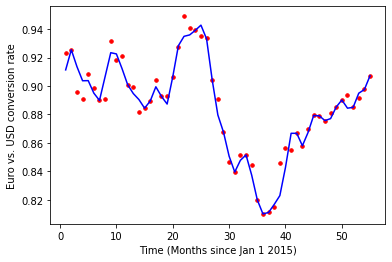

In [338]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*l1mdl,'b')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

Text(0.5, 1.0, 'L2 norm residuals')

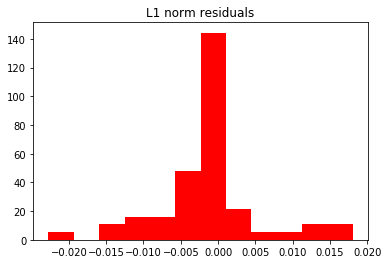

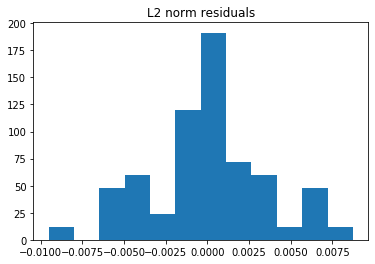

In [339]:
l1residuals = X * l1mdl - rates
plt.hist(l1residuals, bins=12, density=True, color='red')
plt.title('L1 norm residuals')
plt.figure(2)
plt.hist(residuals, bins=12, density=True)
plt.title('L2 norm residuals')


In [202]:
newPredsL1 = newX * l1mdl
print(newPredsL1)

[[0.90719877]
 [0.93944539]
 [0.96974538]
 [0.98565124]
 [1.00668781]
 [1.04858758]]


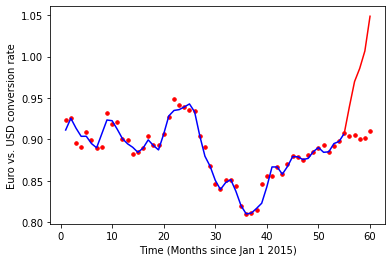

In [340]:
plt.plot(t0, r0,'r.',markerSize=7)
plt.plot(times, X*l1mdl,'b')
plt.plot(newTimes, newPredsL1,'r')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')
plt.savefig('euro-csv-data-nonlin-l1-plot.png')

# Auto regressive Models

In [0]:
def prepareARMAXModel(timeSeries, p, h, testing=False):
    if not testing:
        y = timeSeries[(p+h-1):, :]
        nRows = y.shape[0]
    else: 
        nRows = timeSeries.shape[0] - p
        y = None
    X = np.ones((nRows,1))
    for i in range(p):
        X = np.concatenate((X, timeSeries[i:i+nRows,:]), axis = 1)
    return (X,y)


In [0]:
# Prepare the training data to just have 45
(X, y) = prepareARMAXModel(r0[1:45, :], 5, 1)

In [343]:
arMdl = np.linalg.lstsq(X, y, rcond=None)[0]
residuals = y - X * arMdl
print('%f + %f * x(t-4) + %f * x(t-3)+ %f * x(t-2) + %f * x(t-1) * %f * x(t)' % (arMdl[0], arMdl[1], arMdl[2], arMdl[3], arMdl[4], arMdl[5]))

0.110212 + -0.241503 * x(t-4) + 0.427897 * x(t-3)+ -0.369808 * x(t-2) + -0.134764 * x(t-1) * 1.193654 * x(t)


(array([5., 3., 7., 6., 7., 6., 2., 1., 1., 1.]),
 array([-0.0233688 , -0.01734191, -0.01131503, -0.00528814,  0.00073875,
         0.00676563,  0.01279252,  0.01881941,  0.02484629,  0.03087318,
         0.03690007]),
 <a list of 10 Patch objects>)

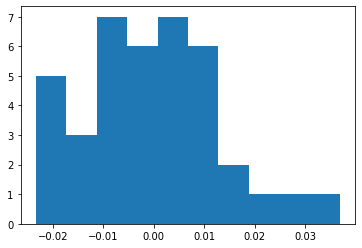

In [344]:
plt.hist(residuals, bins=10)

(15, 6)


Text(0.5, 1.0, 'ARMAX Prediction on Unseen Data')

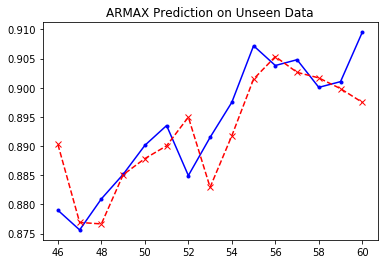

In [345]:
(X, _) = prepareARMAXModel(r0[40:60, :], 5, 1, testing=True)
plt.plot(t0[45:60], r0[45:60], 'b.-')
print(X.shape)
plt.plot(range(46,61), X * arMdl, '--xr')
plt.title('ARMAX Prediction on Unseen Data')

In [346]:
(X, y) = prepareARMAXModel(r0[40:60, :], 5, 1, testing=False)
l1ARMMdl, l1Res = solveL1NormLeastSquares(X, y)

r_0 = 0.434503
r_1 = 0.4904633
r_2 = 0.0
r_3 = 0.029155602
r_4 = 0.0
r_5 = 0.0
t_0 = 0.0
t_1 = 0.0093172303
t_10 = 0.0050790862
t_11 = 0.010101103
t_12 = 0.0018665314
t_13 = 0.0
t_14 = 0.003685027
t_2 = 0.0
t_3 = 0.0017186825
t_4 = 0.0014621436
t_5 = 0.0022178942
t_6 = 0.0048270035
t_7 = 0.0010343868
t_8 = 0.0028192048
t_9 = 0.010317736
x_0 = 0.434503
x_1 = 0.4904633
x_2 = 0.0
x_3 = 0.029155602
x_4 = 0.0
x_5 = 0.0


Text(0.5, 1.0, 'L1 Norm Residuals')

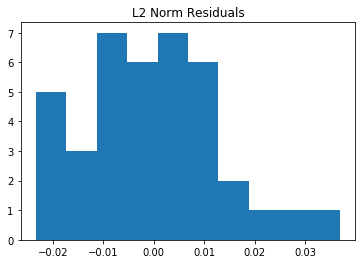

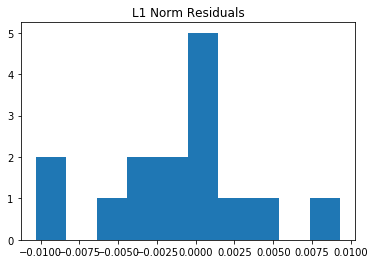

In [349]:

plt.hist(residuals, bins=10)
plt.title('L2 Norm Residuals')
plt.figure(2)
plt.hist(l1Res, bins=10)
plt.title('L1 Norm Residuals')

(15, 6)


Text(0.5, 1.0, 'ARMAX Prediction on Unseen Data (L1 Norm)')

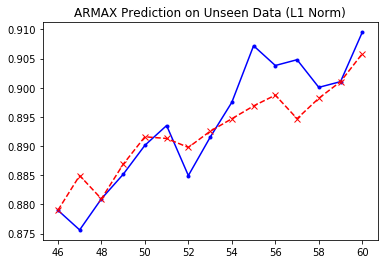

In [350]:
(X, _) = prepareARMAXModel(r0[40:60, :], 5, 1, testing=True)
plt.plot(t0[45:60], r0[45:60], 'b.-')
print(X.shape)
plt.plot(range(46,61), X * l1ARMMdl, '--xr')
plt.title('ARMAX Prediction on Unseen Data (L1 Norm)')


In [0]:
(X, y) = prepareARMAXModel(r0[0:40, :], 8, 1, testing=False)
armMdl10 = np.linalg.lstsq(X, y, rcond=None)[0]


(12, 9)


Text(0.5, 1.0, 'ARMAX Prediction on Unseen Data (L2 Norm)')

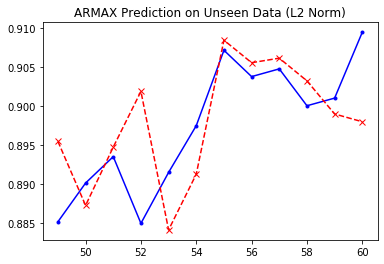

In [318]:
(X, _) = prepareARMAXModel(r0[40:60, :], 8, 1, testing=True)
plt.plot(t0[48:60], r0[48:60], 'b.-')
print(X.shape)
plt.plot(range(49,61), X * armMdl10, '--xr')
plt.title('ARMAX Prediction on Unseen Data (L2 Norm)')

In [0]:
(X, y) = prepareARMAXModel(r0[0:30, :], 15, 1, testing=False)
armMdl15 = np.linalg.lstsq(X, y, rcond=None)[0]

(15, 16)


Text(0.5, 1.0, 'ARMAX Prediction on Unseen Data (L2 Norm)')

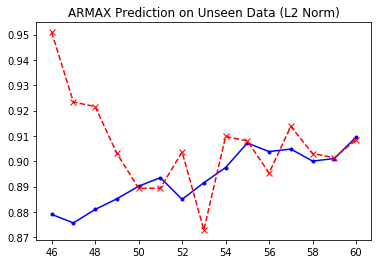

In [354]:
(X, _) = prepareARMAXModel(r0[30:60, :], 15, 1, testing=True)
plt.plot(t0[45:60], r0[45:60], 'b.-')
print(X.shape)
plt.plot(range(46,61), X * armMdl15, '--xr')
plt.title('ARMAX Prediction on Unseen Data (L2 Norm)')

# Data from patients with type-1 diabetes

[[148.0], [150.0], [154.0], [158.0], [158.0], [157.0], [154.0], [153.0], [149.0], [147.0], [145.0], [145.0], [147.0], [147.0], [145.0], [140.0], [135.0], [129.0], [121.0], [118.0], [119.0], [122.0], [124.0], [128.0], [131.0], [134.0], [142.0], [147.0], [149.0], [150.0], [150.0], [143.0], [136.0], [130.0], [127.0], [126.0], [127.0], [134.0], [137.0], [140.0], [141.0], [144.0], [151.0], [159.0], [153.0], [158.0], [170.0], [188.0], [197.0], [204.0], [225.0], [233.0], [241.0], [248.0], [257.0], [259.0], [263.0], [266.0], [269.0], [267.0], [256.0], [251.0], [248.0], [244.0], [240.0], [235.0], [230.0], [224.0], [219.0], [216.0], [213.0], [212.0], [208.0], [204.0], [201.0], [201.0], [202.0], [204.0], [207.0], [210.0], [215.0], [220.0], [223.0], [228.0], [236.0], [239.0], [242.0], [246.0], [249.0], [250.0], [258.0], [250.0], [244.0], [239.0], [235.0], [232.0], [229.0], [225.0], [223.0], [220.0], [215.0], [213.0], [213.0], [207.0], [200.0], [193.0], [183.0], [178.0], [172.0], [170.0], [172.0], 

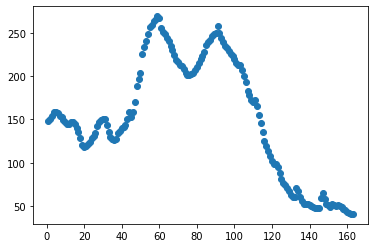

In [369]:
def openCSVFile(fileName, cols): 
    f = open(fileName)
    data = []
    for line in f:
        lineEntries = line.split(',')
        data.append([float(lineEntries[j]) for j in cols])
    f.close()
    return data
glucose113 = openCSVFile('./session-113-data113.csv', [0])
print(glucose113)
G = np.matrix(glucose113)
plt.plot(range(1,164), G, 'o')


### ARMAX model with lookback of 10 steps

In [388]:
## Predict Glucose values 25 minutes into the future
## Using 450 minutes minutes of data
## Look back of 10 steps
(X,y) = prepareARMAXModel(G[0:90], 10, 5, testing=False)
print(X.shape)

(76, 11)


(array([ 2.,  0.,  1.,  2., 18., 21., 16.,  6.,  2.,  8.]),
 array([-53.92029295, -44.8585125 , -35.79673205, -26.73495159,
        -17.67317114,  -8.61139068,   0.45038977,   9.51217022,
         18.57395068,  27.63573113,  36.69751159]),
 <a list of 10 Patch objects>)

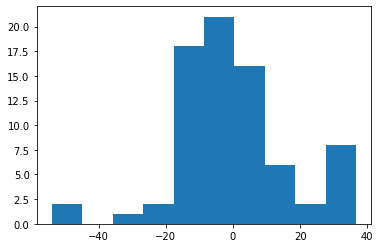

In [389]:
gluc113mdl = np.linalg.lstsq(X, y, rcond = None)[0]
residuals = X * gluc113mdl - y 
plt.hist(residuals)

In [0]:
(X,_) = prepareARMAXModel(G, 10, 5, testing=True)

Text(0, 0.5, 'G (mg/dl)')

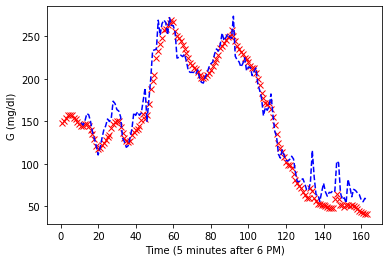

In [391]:
plt.plot(range(1, 164), G, 'rx')
plt.plot(range(11,164), X * gluc113mdl, 'b--')
plt.xlabel('Time (5 minutes after 6 PM)')
plt.ylabel('G (mg/dl)')

### ARMAX Mdl with look back of 20 steps



In [392]:
## Predict Glucose values 25 minutes into the future
## Using 450 minutes minutes of data
## Look back of 10 steps
(X,y) = prepareARMAXModel(G[0:90], 20, 5, testing=False)
print(X.shape)

(66, 21)


(array([ 1.,  1.,  1.,  5., 19., 16., 14.,  4.,  1.,  4.]),
 array([-48.27730254, -39.42363108, -30.56995963, -21.71628817,
        -12.86261671,  -4.00894525,   4.8447262 ,  13.69839766,
         22.55206912,  31.40574057,  40.25941203]),
 <a list of 10 Patch objects>)

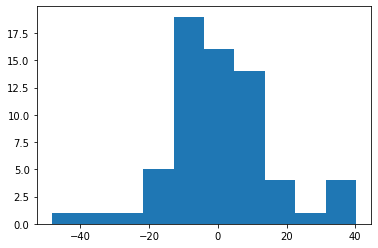

In [393]:
gluc113mdl = np.linalg.lstsq(X, y, rcond = None)[0]
residuals = X * gluc113mdl - y 
plt.hist(residuals)

Text(0, 0.5, 'G (mg/dl)')

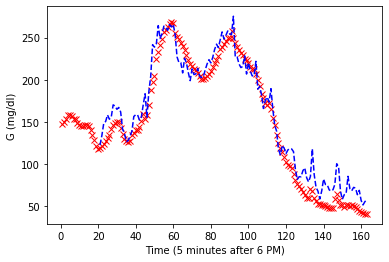

In [396]:
(X,_) = prepareARMAXModel(G, 20, 5, testing=True)
plt.plot(range(1, 164), G, 'rx')
plt.plot(range(21,164), X * gluc113mdl, 'b--')
plt.xlabel('Time (5 minutes after 6 PM)')
plt.ylabel('G (mg/dl)')